# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
from app.models.srex.ranking import Ranking
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Initialize some variables

In [2]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one
newStopWords = get_stop_words('en') # a big one
stop_words_list.extend(newStopWords) # all together

In [3]:
query                    = '"internet of things" OR iot'
#query                    = '("Document Title":internet of things   OR   ("Document Title":iot  AND "Document Title":device  )  )  AND ("Abstract":security NOT  "Abstract":visual OR "Document Title":network)'
#query                    = '((( literature  OR document OR information OR data ) AND (retrieval OR retrieve)) OR (search AND engine)  )  AND  (query AND  ( expansion OR refinement OR reformulation))'
nr_search_results        = 10

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_query_terms  = True

In [4]:
ranking = Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)
ranking.calculate_ieee_xplore_ranking()
#articles = ranking.get_ieee_xplore_ranking()
#dicts = [{"title": a.get('title', ''), "abstract": a.get('abstract', ''), "article_number": a.get('article_number', '')} for a in articles]
#import json
#print(json.dumps(dicts, indent=2))

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_query_terms, summarize)

In [6]:
for d in ranking.get_documents():
    print(f"TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

TITLE: Communication Protocol Stack for Constrained IoT Systems (id:8519904)
txt: communication protocol stack constrained iot system
txt: internet_thing iot gained huge popularity rapid advancement wide applicability real world application transformed life
txt: communication play integral role connecting iot device
txt: effective communication iot protocol offer lightweight secure reliable communication without compromising computational energy limitation employed constrained iot device need hour
txt: 
txt: paper insight various iot protocol applied different layer iot protocol suite analyze efficacy reliability protocol basis energy efficiency security lightweight nature protocol
TITLE: Internet of Things Security - Multilayered Method For End to End Data Communications Over Cellular Networks (id:8767227)
txt: internet_thing security multilayered method end end data communication cellular network
txt: aim paper put forth multilayered method securing data transport cellular connected 

In [7]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: Communication Protocol Stack for Constrained IoT Systems
vecinity matrix: {'communication': {'iot': [0, 0, 0, 1]}, 'protocol': {'iot': [0, 0, 1, 0]}, 'stack': {'iot': [0, 1, 0, 0]}, 'constrained': {'iot': [1, 0, 0, 0]}, 'system': {'iot': [1, 0, 0, 0]}}
vecinity matrix: {'internet_thing': {'iot': [1, 0, 0, 0]}, 'iot': {'internet_thing': [1, 0, 0, 0]}, 'gained': {'internet_thing': [0, 1, 0, 0], 'iot': [1, 0, 0, 0]}, 'huge': {'internet_thing': [0, 0, 1, 0], 'iot': [0, 1, 0, 0]}, 'popularity': {'internet_thing': [0, 0, 0, 1], 'iot': [0, 0, 1, 0]}, 'rapid': {'iot': [0, 0, 0, 1]}}
vecinity matrix: {'play': {'iot': [0, 0, 0, 1]}, 'integral': {'iot': [0, 0, 1, 0]}, 'role': {'iot': [0, 1, 0, 0]}, 'connecting': {'iot': [1, 0, 0, 0]}, 'device': {'iot': [1, 0, 0, 0]}}
vecinity matrix: {'effective': {'iot': [0, 1, 0, 0]}, 'communication': {'iot': [1, 0, 0, 0]}, 'protocol': {'iot': [1, 0, 0, 0]}, 'offer': {'iot': [0, 1, 0, 0]}, 'lightweight': {'iot': [0, 0, 1, 0]}, 'secure': {'iot': [0, 0, 0, 1

In [8]:
#Show graphs from the ranking class
print(ranking.get_graph())

SUBQUERY: internet_thing OR iot
TERM: internet_thing ; PONDERATION: 11.4 ; DISTANCE: 1.0
TERM: iot ; PONDERATION: 11.4 ; DISTANCE: 1.0
TERM: field ; PONDERATION: 7.7 ; DISTANCE: 2.8
TERM: device ; PONDERATION: 7.5 ; DISTANCE: 1.0
TERM: technology ; PONDERATION: 7.0 ; DISTANCE: 3.2
TERM: system ; PONDERATION: 6.2 ; DISTANCE: 2.1
TERM: network ; PONDERATION: 6.2 ; DISTANCE: 2.0
TERM: secure ; PONDERATION: 5.5 ; DISTANCE: 3.0
TERM: communication ; PONDERATION: 5.5 ; DISTANCE: 3.1
TERM: solution ; PONDERATION: 5.2 ; DISTANCE: 2.3
TERM: protocol ; PONDERATION: 5.0 ; DISTANCE: 2.0
TERM: emerging ; PONDERATION: 4.3 ; DISTANCE: 3.4
TERM: sensing ; PONDERATION: 3.7 ; DISTANCE: 2.0
TERM: compressive ; PONDERATION: 3.7 ; DISTANCE: 3.0
TERM: data ; PONDERATION: 3.6 ; DISTANCE: 3.5
TERM: application ; PONDERATION: 3.6 ; DISTANCE: 1.0
TERM: main ; PONDERATION: 3.5 ; DISTANCE: 2.5
TERM: emf ; PONDERATION: 3.5 ; DISTANCE: 2.5
TERM: 5g ; PONDERATION: 3.5 ; DISTANCE: 1.5
TERM: exposure ; PONDERATION: 3.

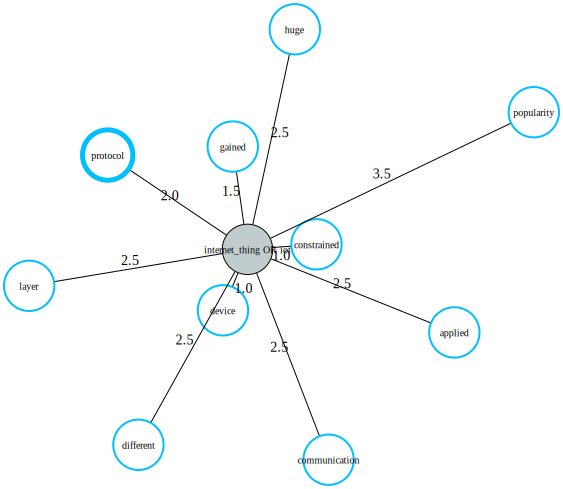

In [9]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

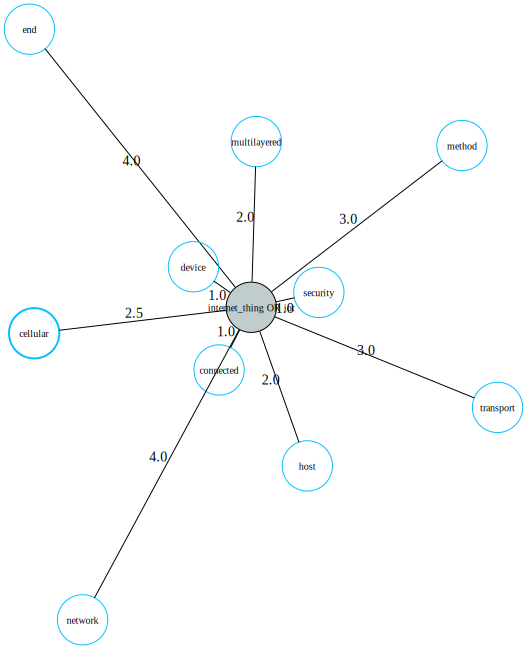

In [10]:
visual_graph2 = ranking.get_document_by_ranking_position(2).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

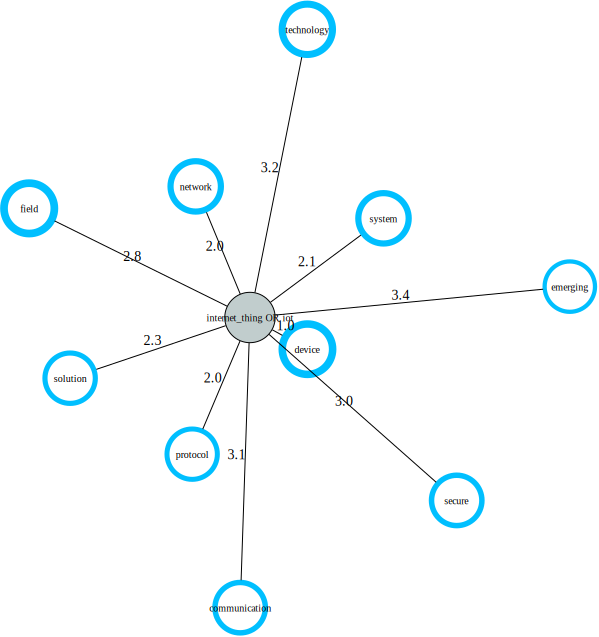

In [11]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [12]:
ranking.get_graph().get_cosine_similarity(ranking.get_document_by_ranking_position(1).get_graph())

0.46230265973000406